In [65]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitchdata/twitchdata-update.csv


In [1]:
import numpy  as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn           as sns
import base64
from IPython.display import display, HTML
from wordcloud import WordCloud
plt.style.use('dark_background')

# Twitch Streamer Analysis
* Factors contributing the popularity of the streamer

In [3]:

data = pd.read_csv('twitchdata-update.csv')
data.head(5)

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


#  General Information of Streamers
* Followers count ranging from thousand to millions
* various number of languages are present since e-gaming is expanded world wide

In [4]:
data.describe()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.184279e+08,120515.160000,37065.051000,4781.040000,5.700541e+05,2.055185e+05,1.166817e+07
std,5.496355e+08,85376.201364,60314.307686,8453.684965,8.044134e+05,3.399137e+05,2.490572e+07
min,1.221928e+08,3465.000000,496.000000,235.000000,3.660000e+03,-1.577200e+04,1.757880e+05
25%,1.631899e+08,73758.750000,9113.750000,1457.750000,1.705462e+05,4.375825e+04,3.880602e+06
50%,2.349908e+08,108240.000000,16676.000000,2425.000000,3.180630e+05,9.835200e+04,6.456324e+06
75%,4.337399e+08,141843.750000,37569.750000,4786.250000,6.243322e+05,2.361308e+05,1.219676e+07
max,6.196162e+09,521445.000000,639375.000000,147643.000000,8.938903e+06,3.966525e+06,6.701375e+08



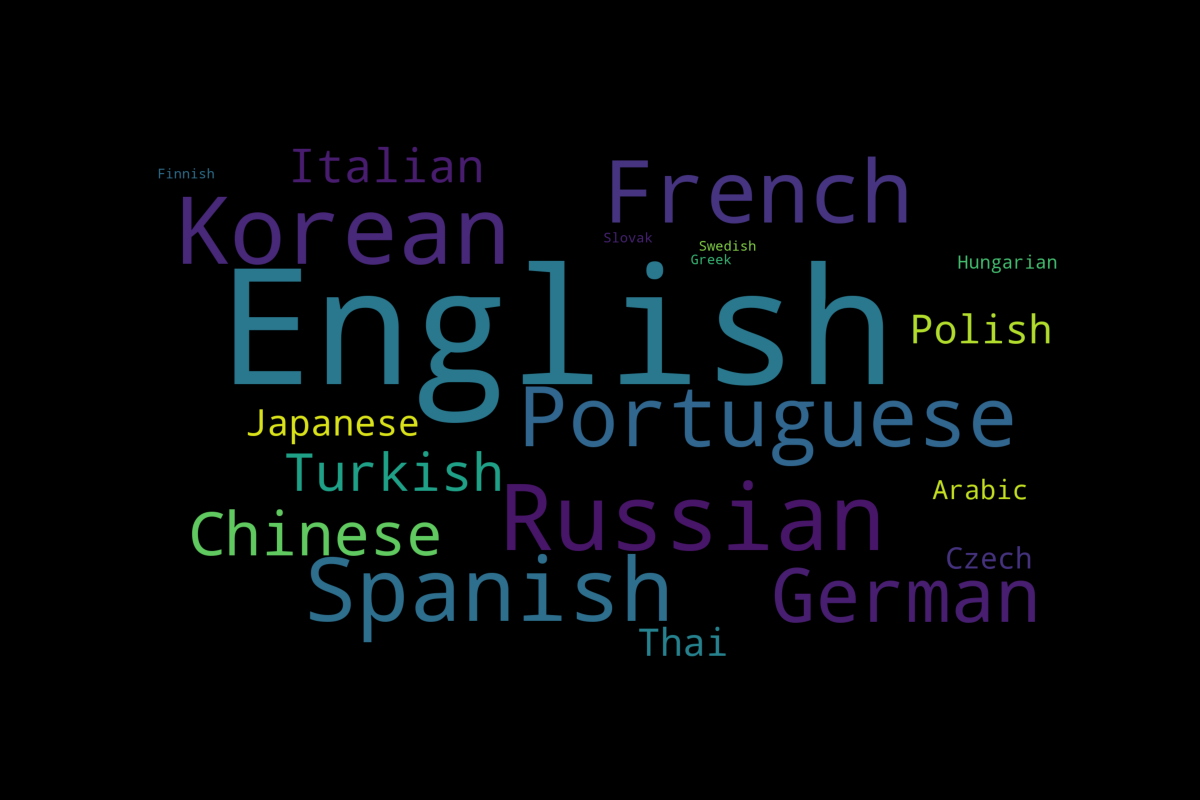

In [5]:
plt.subplots(figsize=(12, 8))
wordcloud = WordCloud(
    background_color='Black',
    width=1920,
    height=1080
).generate(" ".join(data.Language))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('output_wordcloud.png')
plt.close()
with open("output_wordcloud.png", "rb") as img_file:
    img_data = img_file.read()

img_base64 = base64.b64encode(img_data).decode("utf-8")
html_code = f'''
<div style="background-color:black; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))

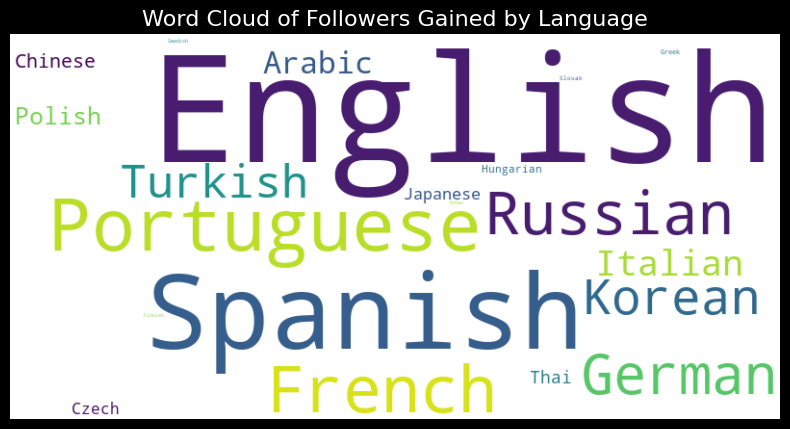

In [6]:
# Ensure 'Language' and 'Followers gained' columns are available
if 'Language' in data.columns and 'Followers gained' in data.columns:
    # Create a frequency dictionary for the WordCloud
    freq_dict = data.groupby('Language')['Followers gained'].sum().to_dict()

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(freq_dict)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Followers Gained by Language', fontsize=16)
    plt.show()
else:
    print("Columns 'Language' and 'Followers gained' not found in the dataset.")

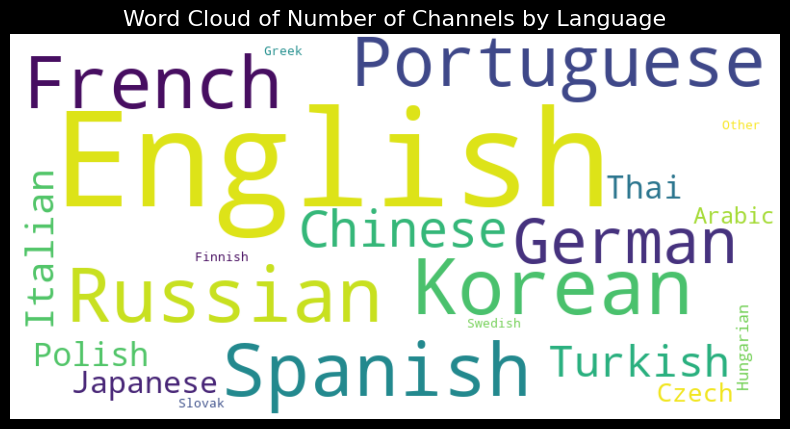

In [71]:
    language_counts = data['Language'].value_counts().to_dict()

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(language_counts)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Number of Channels by Language', fontsize=16)
    plt.show()

* English gamers have more participant community
* portugese streamers have a good expansion momentum

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log1p



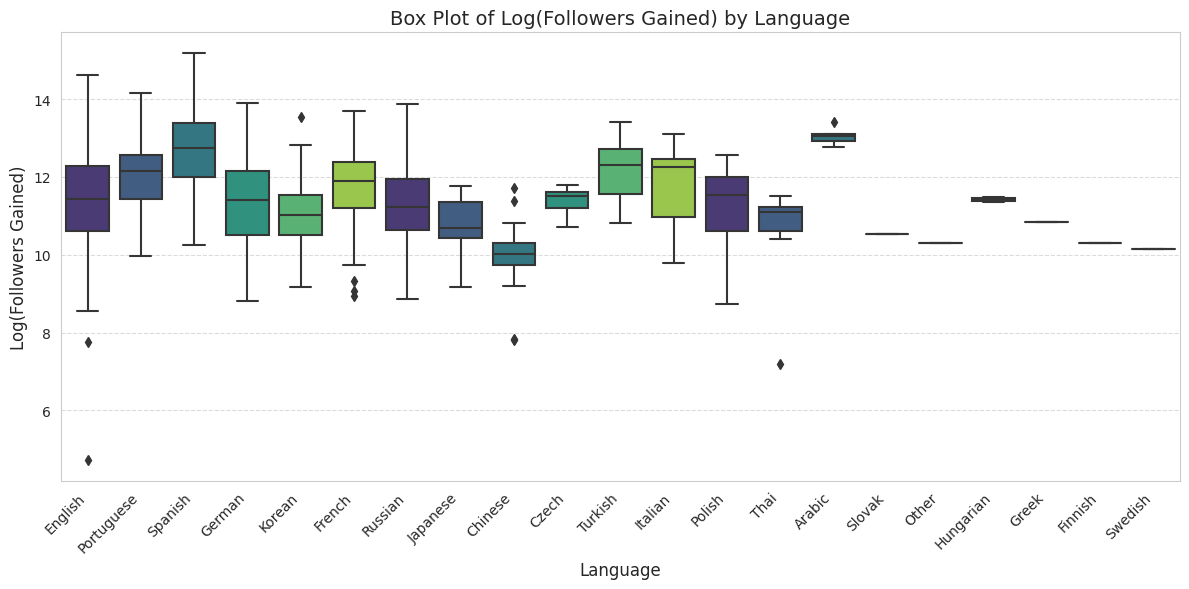

In [72]:
    # data['Log Followers Gained'] = np.log1p(data['Followers gained'])  # log1p handles log(0)

    # # Set up the plot
    # plt.figure(figsize=(12, 6))
    # sns.boxplot(data=data, x='Language', y='Log Followers Gained', palette='viridis')

    # # Customize the plot
    # plt.xticks(rotation=45, ha='right')
    # plt.xlabel('Language', fontsize=12)
    # plt.ylabel('Log(Followers Gained)', fontsize=12)
    # plt.title('Box Plot of Log(Followers Gained) by Language', fontsize=14)
    # plt.tight_layout()

    # # Show the plot
    # plt.show()

# Set the background style
sns.set_style("whitegrid")  # Options: 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks'

# Adjust the palette for better contrast
palette = sns.color_palette("viridis", as_cmap=False)

# Log-transform the data (if not already done)
data['Log Followers Gained'] = np.log1p(data['Followers gained'])  # log1p handles log(0)

# Set up the plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Language', y='Log Followers Gained', palette=palette, showfliers=True, fliersize=5)

# Customize the plot
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Language', fontsize=12)
plt.ylabel('Log(Followers Gained)', fontsize=12)
plt.title('Box Plot of Log(Followers Gained) by Language', fontsize=14)

# Add gridlines for visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()
    


* english streamers have biggest variance,popular streamers aggregate most of the audience
* poland which is not a biggest country, has rather a stable and strong support from its citizens which could be next consideration for buisiness expansions

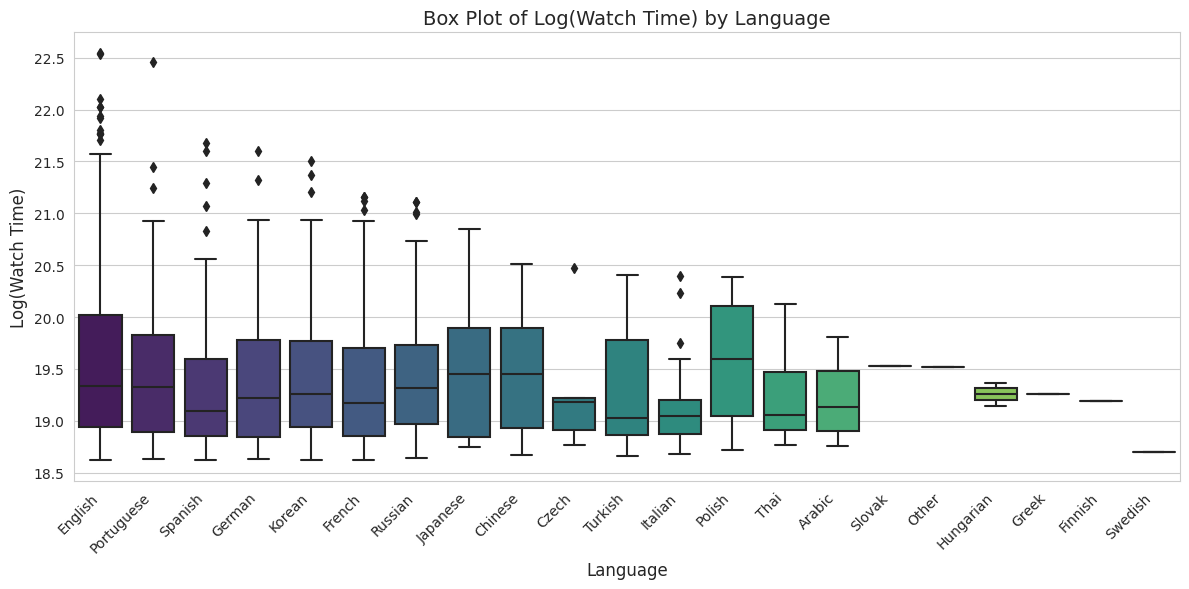

In [73]:
if 'Language' in data.columns and 'Watch time(Minutes)' in data.columns:
    # Add a new column for the log of 'Watch time(Minutes)' (handle non-positive values)
    data['Log Watch Time'] = np.log1p(data['Watch time(Minutes)'])  # log1p handles log(0)

    # Set up the plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data, x='Language', y='Log Watch Time', palette='viridis')

    # Customize the plot
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Language', fontsize=12)
    plt.ylabel('Log(Watch Time)', fontsize=12)
    plt.title('Box Plot of Log(Watch Time) by Language', fontsize=14)
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print("Columns 'Language' and 'Watch time(Minutes)' not found in the dataset.")

# Indicators changing channels growth

* no correlation concerning the stream time with watch time

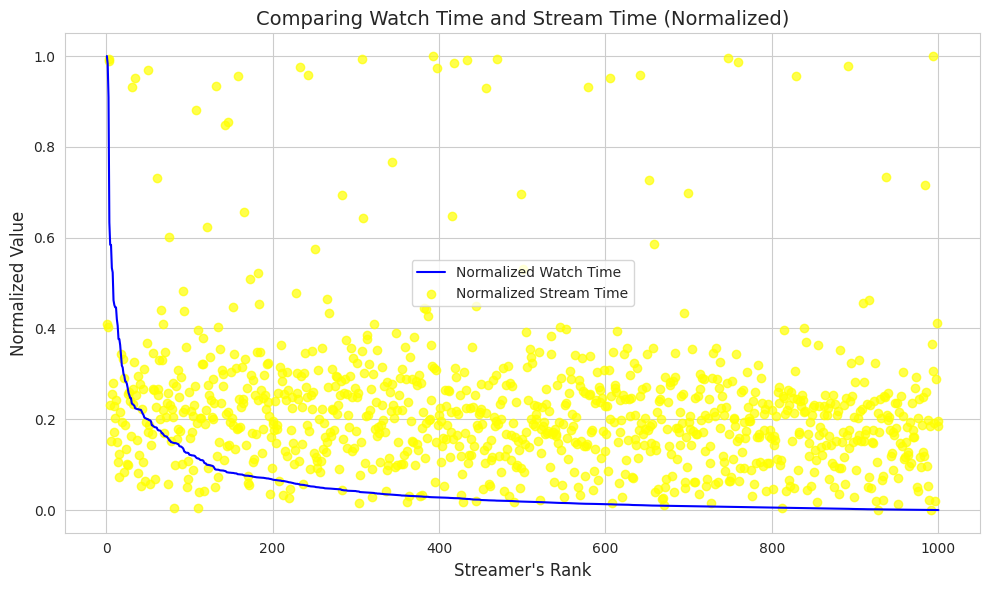

In [74]:
if 'Watch time(Minutes)' in data.columns and 'Stream time(minutes)' in data.columns:
    # Create normalized columns (min-max normalization)
    data['Normalized Watch Time'] = (data['Watch time(Minutes)'] - data['Watch time(Minutes)'].min()) / \
                                    (data['Watch time(Minutes)'].max() - data['Watch time(Minutes)'].min())
    data['Normalized Stream Time'] = (data['Stream time(minutes)'] - data['Stream time(minutes)'].min()) / \
                                     (data['Stream time(minutes)'].max() - data['Stream time(minutes)'].min())

    # Sort by rank (assume index represents rank; otherwise, create a rank column)
    data = data.sort_values(by='Normalized Watch Time', ascending=False).reset_index(drop=True)
    data['Rank'] = data.index + 1

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(data['Rank'], data['Normalized Watch Time'], label='Normalized Watch Time', color='blue')
    plt.scatter(data['Rank'], data['Normalized Stream Time'], label='Normalized Stream Time', color='yellow', alpha=0.7)

    # Customize the plot
    plt.xlabel("Streamer's Rank", fontsize=12)
    plt.ylabel("Normalized Value", fontsize=12)
    plt.title("Comparing Watch Time and Stream Time (Normalized)", fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Show the plot
    plt.show()

* Stream time reggeression line proved there is a small negative correlation as a small channel will have a less exposure which will decrease the chance of viewer findings.

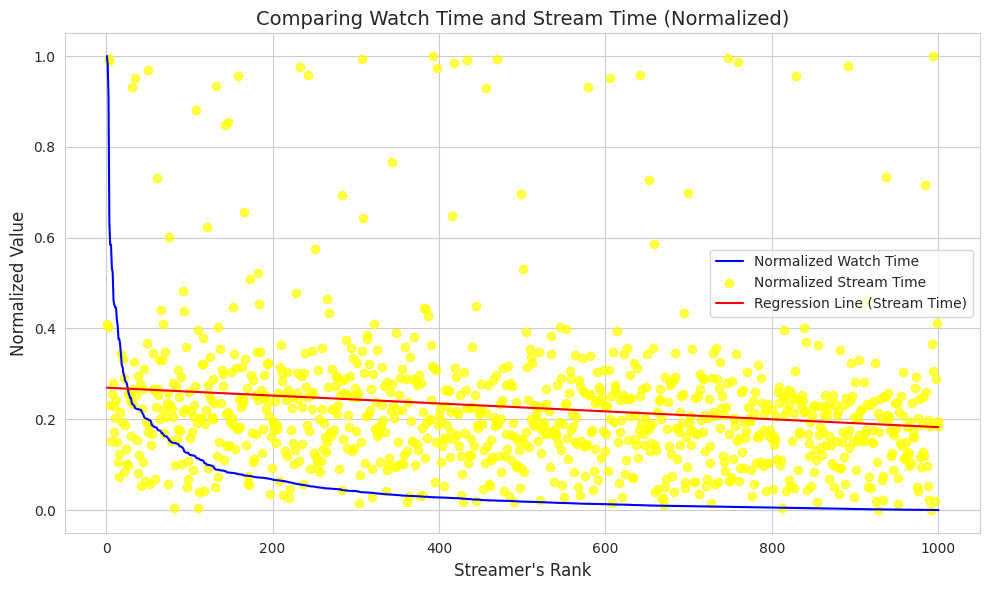

In [75]:
if 'Watch time(Minutes)' in data.columns and 'Stream time(minutes)' in data.columns:
    # Create normalized columns (min-max normalization)
    data['Normalized Watch Time'] = (data['Watch time(Minutes)'] - data['Watch time(Minutes)'].min()) / \
                                    (data['Watch time(Minutes)'].max() - data['Watch time(Minutes)'].min())
    data['Normalized Stream Time'] = (data['Stream time(minutes)'] - data['Stream time(minutes)'].min()) / \
                                     (data['Stream time(minutes)'].max() - data['Stream time(minutes)'].min())

    # Sort by rank (assume index represents rank; otherwise, create a rank column)
    data = data.sort_values(by='Normalized Watch Time', ascending=False).reset_index(drop=True)
    data['Rank'] = data.index + 1

    # Linear regression for Watch Time
    coeffs_watch = np.polyfit(data['Rank'], data['Normalized Watch Time'], 1)  # Linear fit
    reg_watch = np.polyval(coeffs_watch, data['Rank'])  # Evaluate the line

    # Linear regression for Stream Time
    coeffs_stream = np.polyfit(data['Rank'], data['Normalized Stream Time'], 1)  # Linear fit
    reg_stream = np.polyval(coeffs_stream, data['Rank'])  # Evaluate the line

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(data['Rank'], data['Normalized Watch Time'], label='Normalized Watch Time', color='blue')
    plt.scatter(data['Rank'], data['Normalized Stream Time'], label='Normalized Stream Time', color='yellow', alpha=0.7)
    #plt.plot(data['Rank'], reg_watch, label='Regression Line (Watch Time)', color='red', linestyle='--')
    plt.plot(data['Rank'], reg_stream, label='Regression Line (Stream Time)', color='red')

    # Customize the plot
    plt.xlabel("Streamer's Rank", fontsize=12)
    plt.ylabel("Normalized Value", fontsize=12)
    plt.title("Comparing Watch Time and Stream Time (Normalized)", fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Show the plot
    plt.show()

# Multiple Linear reggression model
* I want to investigate the potential factors that make the streams become popular
* Our index of popularity is the number of followers , this is our response variable. for the predicted variable we have mature,stream time,language

# Obtained results
* P values of all the coefficients are are smaller than 0.05 indicating that stream time,language and maturity are all significantly contribute the popularity of the streamer for eg: Streming in english can get you more popularity which is consistent to our assumption.
* Specifically average followers owned by the streamers in english are 290400 more than those in other languages.

In [76]:
import statsmodels.formula.api as smf

# Load your data
# Assuming `df` is the DataFrame containing your dataset.
# df = pd.read_csv('your_dataset.csv')

# 1. Data preparation
# Binary encode Mature column
data['Mature'] = data['Mature'].astype(int)

# Group Language into English and Others
data['Language'] = data['Language'].apply(lambda x: 'English' if x == 'English' else 'Others')

# Create a new binary column for Stream Time
average_stream_time = data['Stream time(minutes)'].mean()
data['Frequency_of_Streaming'] = data['Stream time(minutes)'].apply(
    lambda x: 'frequent' if x >= average_stream_time else 'less_frequent'
)

# 2. Fit the regression model
model = smf.ols(
    formula='Followers ~ C(Language) + C(Frequency_of_Streaming) + C(Mature)',
    data=data
).fit()

# 3. Print results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              Followers   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     15.52
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           7.19e-10
Time:                        16:55:31   Log-Likelihood:                -14993.
No. Observations:                1000   AIC:                         2.999e+04
Df Residuals:                     996   BIC:                         3.001e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------